In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
archivo_excel = '/content/revolutspendingondebitcardsdataset211223.xlsx'

In [3]:
# Carga de datos desde el archivo Excel
by_sector = pd.read_excel(archivo_excel, sheet_name='Spending by sector')
by_age = pd.read_excel(archivo_excel, sheet_name='Spending by age')
instore_vs_online = pd.read_excel(archivo_excel, sheet_name='Instore v online')
by_sector_m = pd.read_excel(archivo_excel, sheet_name='Monthly spending by sector')

In [4]:
# We eliminate the first rows since the data is not relevant
by_sector = by_sector.iloc[4:]
column_sector = ["Date", "Total", "Automotive Fuel", "Entertainment", "Food and Drink", "Pubs, restaurants and fast food", "Retail", "Travel and accommodation"]
by_sector.columns = column_sector
by_sector.reset_index(drop=True, inplace=True)

In [5]:
# We eliminate the first rows since the data is not relevant
by_age = by_age.iloc[4:]
column_age = ["Date", "Total", "18-34", "35-54", "+55"]
by_age.columns = column_age
by_age.reset_index(drop=True, inplace=True)

In [6]:
# We eliminate the first rows since the data is not relevant
instore_vs_online = instore_vs_online.iloc[4:]
column_ivso = ["Date", "Online"]
instore_vs_online.columns = column_ivso
instore_vs_online.reset_index(drop=True, inplace=True)

In [7]:
# We eliminate the first rows since the data is not relevant
by_sector_m = by_sector_m.iloc[4:]
column_sector_m = ["Date", "Total", "Automotive Fuel", "Entertainment", "Food and Drink", "Pubs, restaurants and fast food", "Retail", "Travel and accommodation"]
by_sector_m.columns = column_sector_m
by_sector_m.reset_index(drop=True, inplace=True)

***Temporal tendencies***

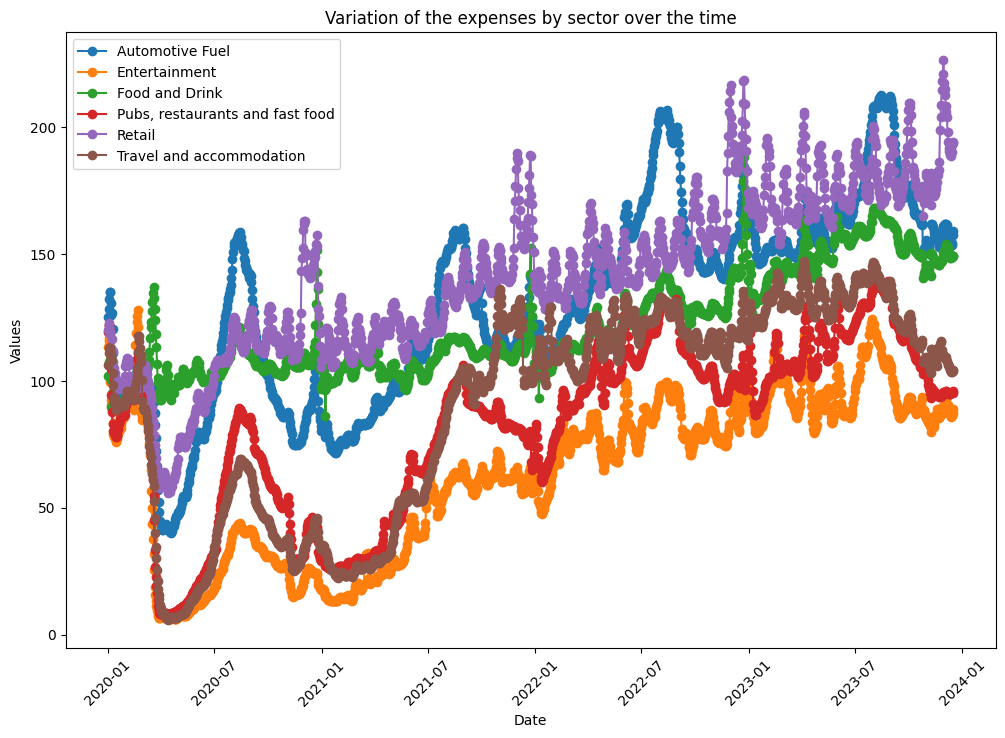

In [8]:
# Data visualization by sector
plt.figure(figsize=(12, 8))

plt.plot(by_sector['Date'], by_sector['Automotive Fuel'], label='Automotive Fuel', marker='o')
plt.plot(by_sector['Date'], by_sector['Entertainment'], label='Entertainment', marker='o')
plt.plot(by_sector['Date'], by_sector['Food and Drink'], label='Food and Drink', marker='o')
plt.plot(by_sector['Date'], by_sector['Pubs, restaurants and fast food'], label='Pubs, restaurants and fast food', marker='o')
plt.plot(by_sector['Date'], by_sector['Retail'], label='Retail', marker='o')
plt.plot(by_sector['Date'], by_sector['Travel and accommodation'], label='Travel and accommodation', marker='o')

plt.title('Variation of the expenses by sector over the time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

plt.xticks(rotation=45)
plt.show()

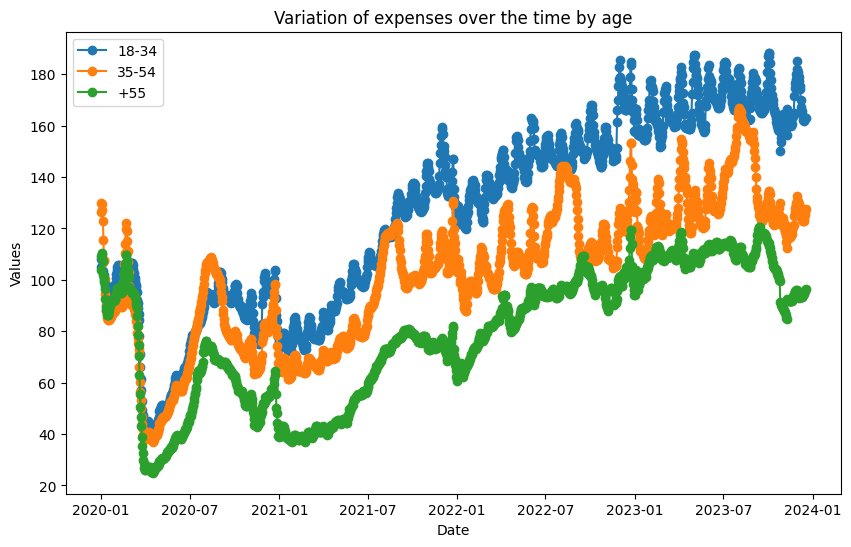

In [9]:
# Data visualization for Age
plt.figure(figsize=(10, 6))

plt.plot(by_age['Date'], by_age['18-34'], label='18-34', marker='o')
plt.plot(by_age['Date'], by_age['35-54'], label='35-54', marker='o')
plt.plot(by_age['Date'], by_age['+55'], label='+55', marker='o')

plt.title('Variation of expenses over the time by age')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

<Figure size 1500x1000 with 0 Axes>

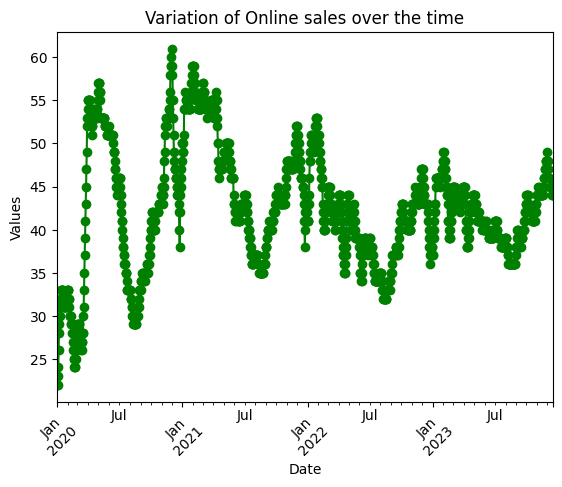

In [10]:
instore_vs_online['Date'] = pd.to_datetime(instore_vs_online['Date'])

# Data Visualization for uses Online
plt.figure(figsize=(15, 10))

instore_vs_online.plot(x='Date', y='Online', kind='line', marker='o', color='green', legend=False)

plt.title('Variation of Online sales over the time')
plt.xlabel('Date')
plt.ylabel('Values')

plt.xticks(rotation=45)
plt.show()

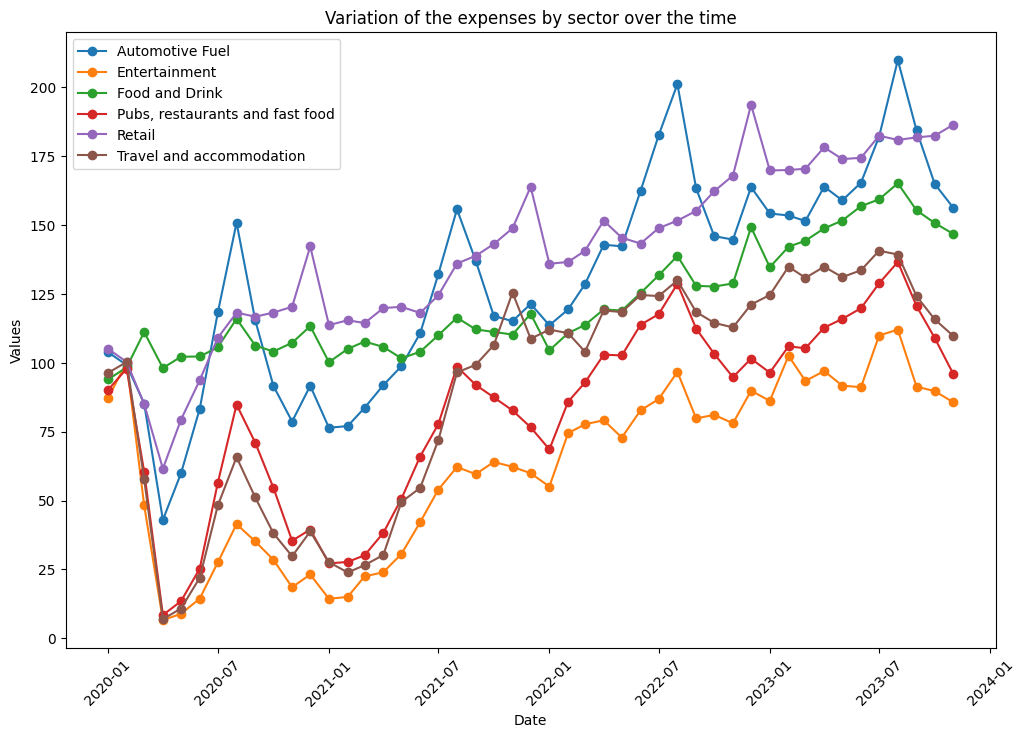

In [11]:
# Data visualization for sales by sector monthly
plt.figure(figsize=(12, 8))

plt.plot(by_sector_m['Date'], by_sector_m['Automotive Fuel'], label='Automotive Fuel', marker='o')
plt.plot(by_sector_m['Date'], by_sector_m['Entertainment'], label='Entertainment', marker='o')
plt.plot(by_sector_m['Date'], by_sector_m['Food and Drink'], label='Food and Drink', marker='o')
plt.plot(by_sector_m['Date'], by_sector_m['Pubs, restaurants and fast food'], label='Pubs, restaurants and fast food', marker='o')
plt.plot(by_sector_m['Date'], by_sector_m['Retail'], label='Retail', marker='o')
plt.plot(by_sector_m['Date'], by_sector_m['Travel and accommodation'], label='Travel and accommodation', marker='o')

plt.title('Variation of the expenses by sector over the time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

plt.xticks(rotation=45)
plt.show()

***Analysis for monthly sales patterns***

In [12]:
print(by_sector_m['Date'].dtype)


object


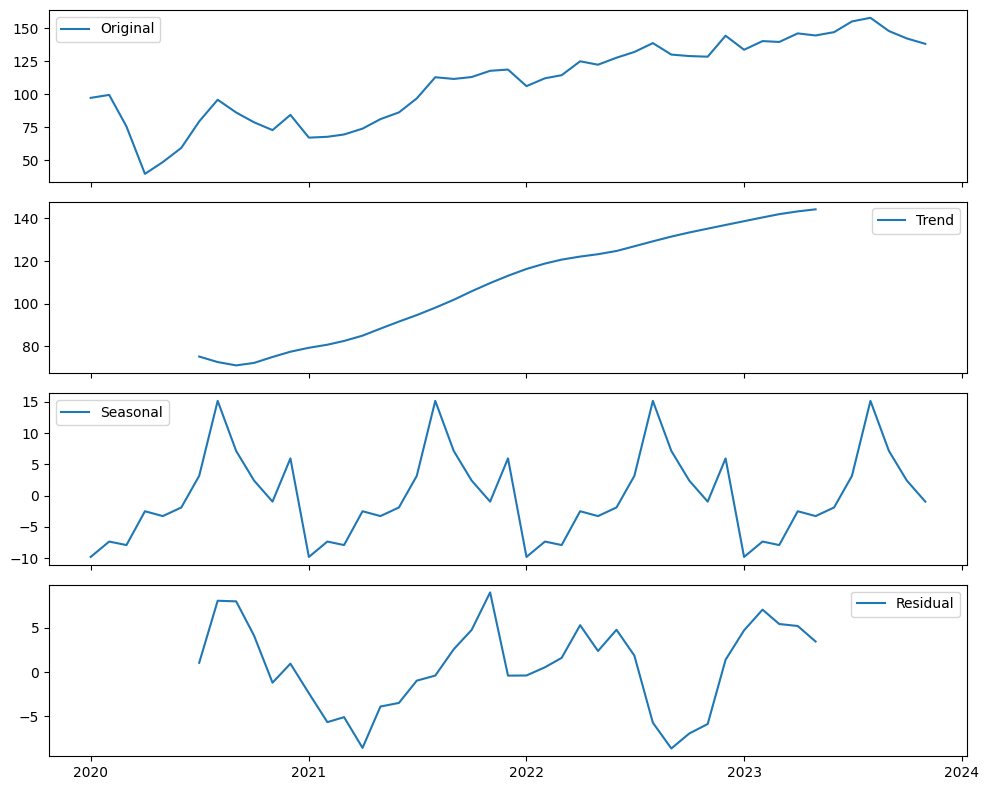

In [16]:
# Check the "Date" format
by_sector_m['Date'] = pd.to_datetime(by_sector_m['Date'], format='%Y-%m-%d')

# Seasonal decomposition
result = seasonal_decompose(by_sector_m['Total'], model='additive', period=12)

# Visualization
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

ax1.plot(by_sector_m['Date'], by_sector_m['Total'], label='Original')
ax1.legend()

ax2.plot(by_sector_m['Date'], result.trend, label='Trend')
ax2.legend()

ax3.plot(by_sector_m['Date'], result.seasonal, label='Seasonal')
ax3.legend()

ax4.plot(by_sector_m['Date'], result.resid, label='Residual')
ax4.legend()

# X-Axis modificator
ax4.xaxis.set_major_locator(mdates.YearLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

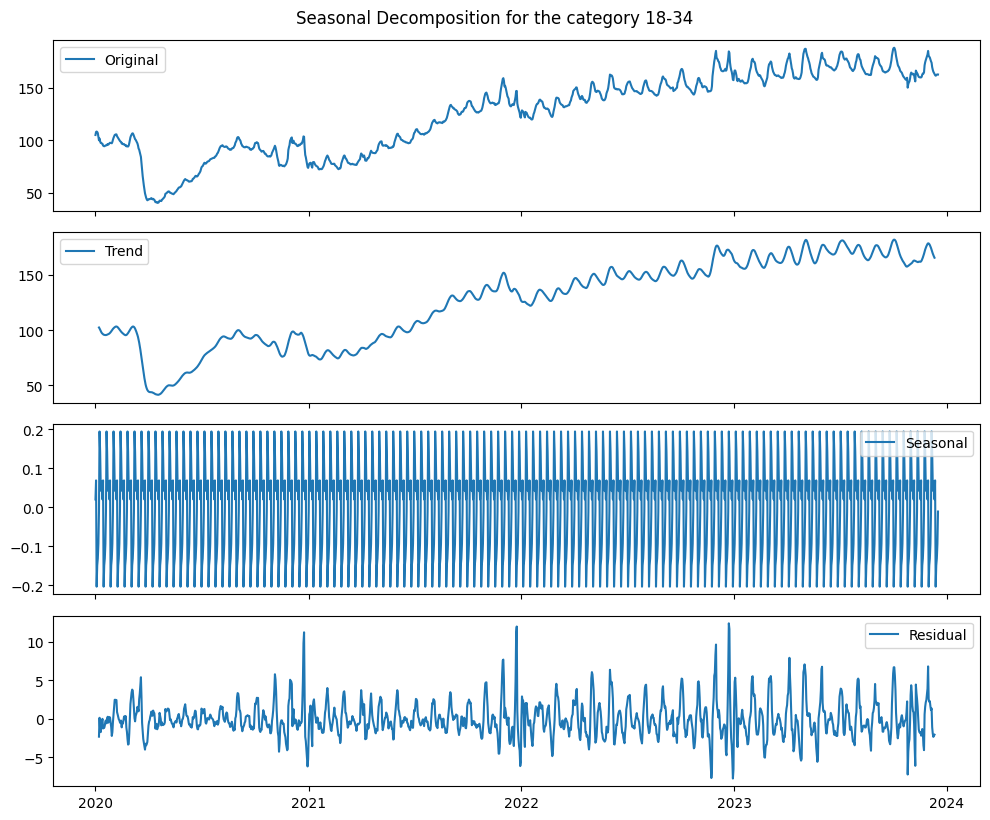

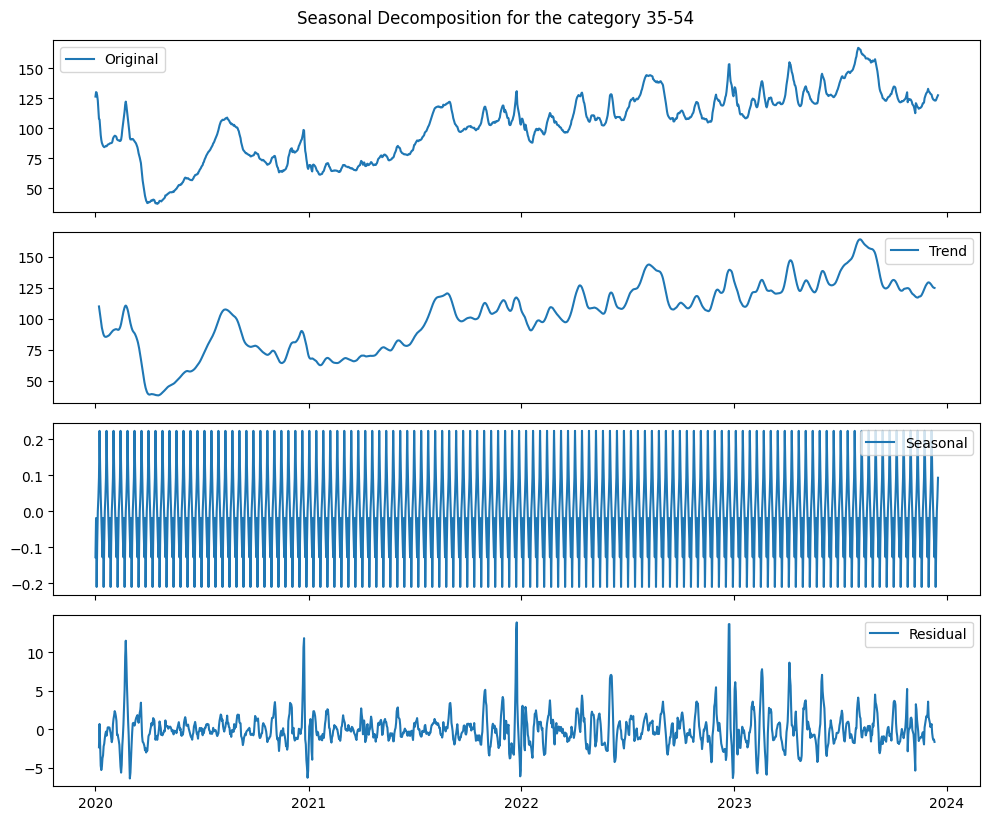

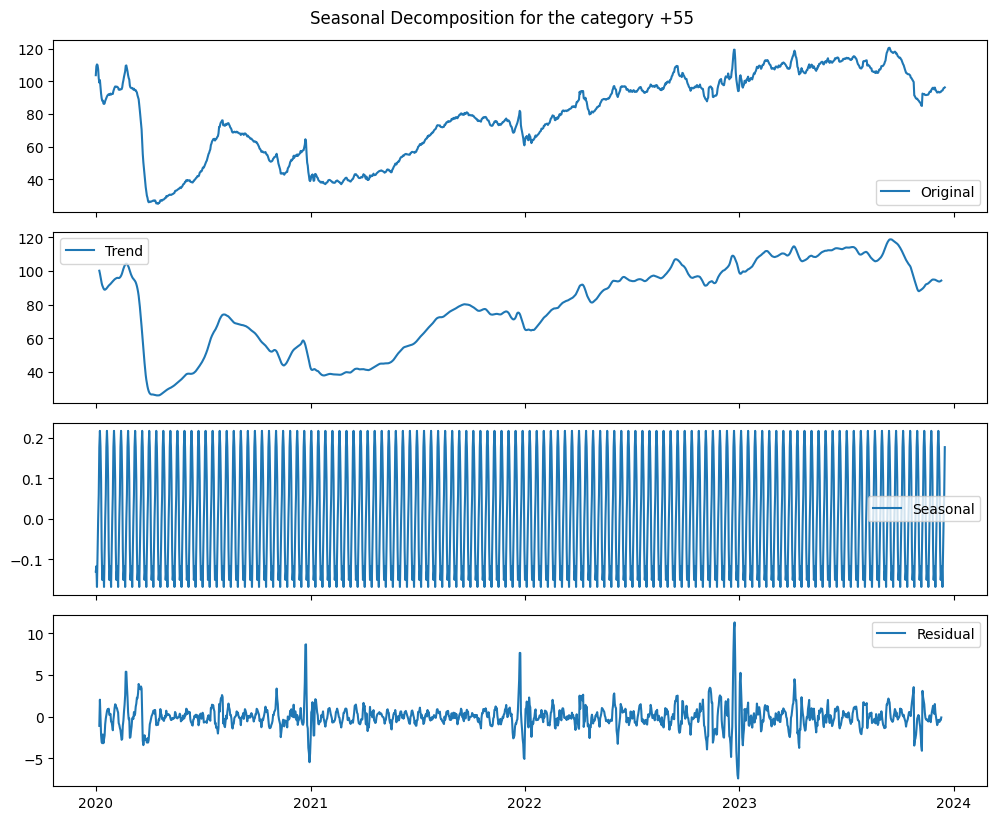

In [17]:
# Check the "Date" format
by_age['Date'] = pd.to_datetime(by_age['Date'], format='%Y-%m-%d')

# Seasonal decomposition
categories = ['18-34', '35-54', '+55']
for category in categories:
    result_by_age = seasonal_decompose(by_age[category], model='additive', period=12)

    # Visualization
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

    ax1.plot(by_age['Date'], by_age[category], label='Original')
    ax1.legend()

    ax2.plot(by_age['Date'], result_by_age.trend, label='Trend')
    ax2.legend()

    ax3.plot(by_age['Date'], result_by_age.seasonal, label='Seasonal')
    ax3.legend()

    ax4.plot(by_age['Date'], result_by_age.resid, label='Residual')
    ax4.legend()

    # X-Axis modification
    ax4.xaxis.set_major_locator(mdates.YearLocator())
    ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    plt.tight_layout()
    plt.suptitle(f'Seasonal Decomposition for the category {category}', y=1.02)
    plt.show()


***Sectors expending the most***

<Figure size 1200x800 with 0 Axes>

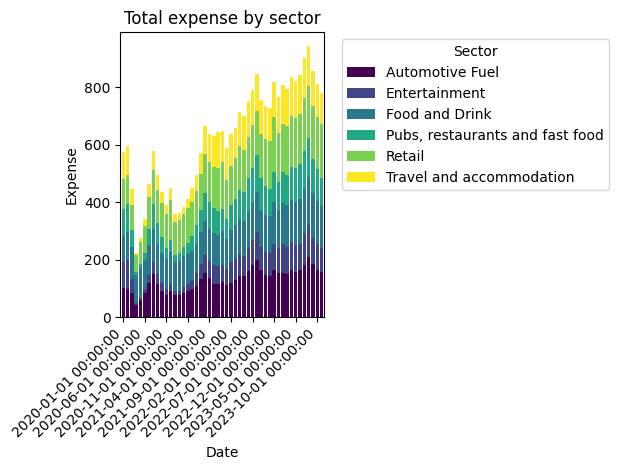

In [18]:
# Main columns for the analysis
sectors_data = by_sector_m.drop(['Date', 'Total'], axis=1)

# Biggest sectors
plt.figure(figsize=(12, 8))
sectors_data.plot(kind='bar', stacked=True, colormap='viridis', width=0.8)
plt.title('Total expense by sector')
plt.xlabel('Date')
plt.ylabel('Expense')
plt.xticks(range(0, len(by_sector_m['Date']), 5), by_sector_m['Date'][::5], rotation=45, ha='right')  # Mostrar cada 5 fechas
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


***Expenses pattern by age group***

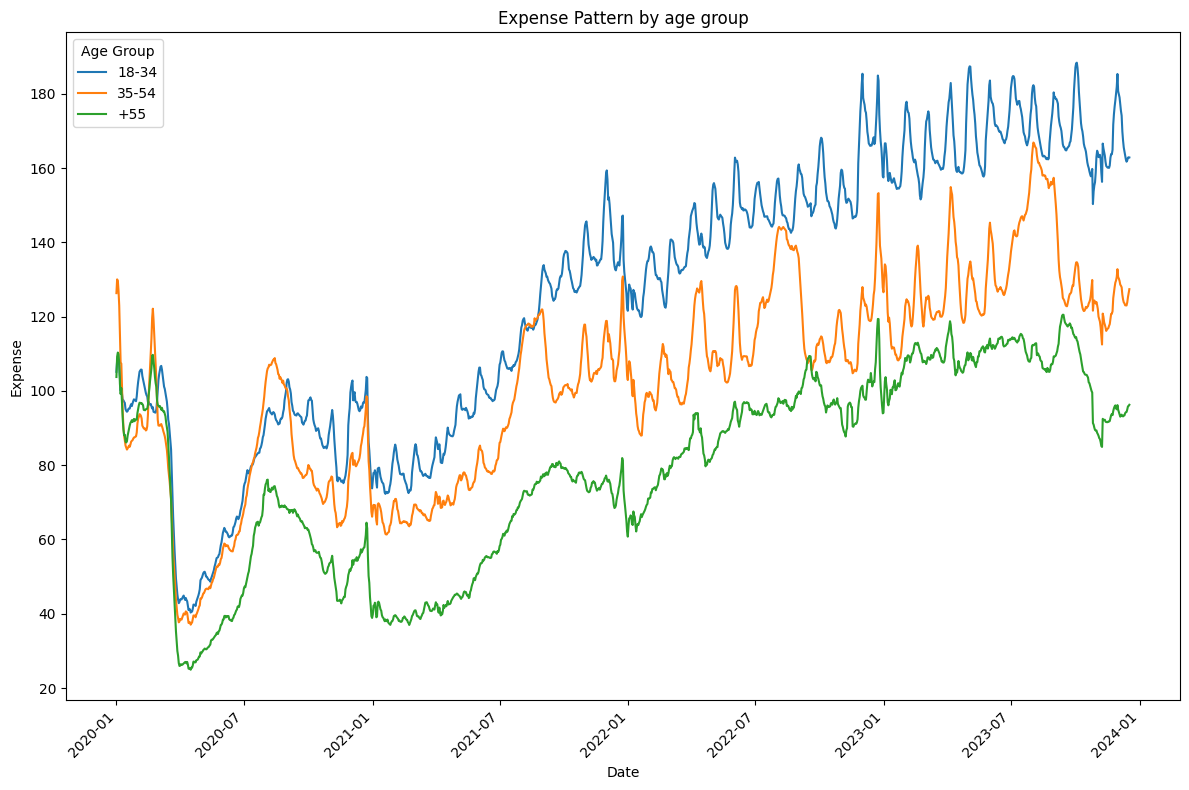

In [20]:
# Checking the "Date" format
by_age['Date'] = pd.to_datetime(by_age['Date'], format='%Y-%m-%d')

plt.figure(figsize=(12, 8))

for age_group in ['18-34', '35-54', '+55']:
    plt.plot(by_age['Date'], by_age[age_group], label=age_group)

plt.title('Expense Pattern by age group')
plt.xlabel('Date')
plt.ylabel('Expense')
plt.legend(title='Age Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()